In [85]:
import numpy as np
from scipy.interpolate import CubicSpline
from matplotlib import pyplot as plt
#import seaborn as sns; sns.set_theme()

#%%
import pandas as pd
import os
datadir = os.path.join('/home/jovyan/data/hydroinformatics/syn_topo/data/') # directory for some sample data files
#filename = 'Elevation_profile2.csv'
filename = "Shallotte_profile.csv"
filepath = os.path.join(datadir, filename)
df = pd.read_csv(filepath)

#%%
elev = df.loc[:,'Elevation']
dist = (df.loc[:,'X_axis']-1)*3
dist = (dist-max(dist))*(-1)
#%%
#Create spline model

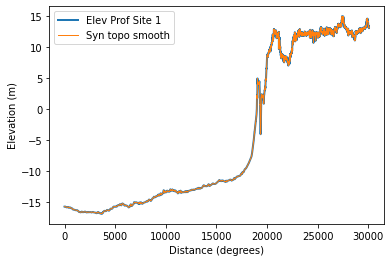

In [86]:

cs = CubicSpline(dist,elev)

syn_elev = cs(dist)

# %%
# Estimating the standard deviation for the noise

# SD_sample = np.std(elev-syn_elev)
# noise = np.random.normal(0, .25, len(elev))
# syn_elev_rough = syn_elev + noise

#%%

#Generating Plots

plt.figure()
# plt.subplot(2, 1, 1)
plt.plot(dist, elev, linewidth=2, label='Elev Prof Site 1')
plt.plot(dist, syn_elev, linewidth=1, label='Syn topo smooth')
plt.xlabel('Distance (degrees)')
plt.ylabel('Elevation (m)')
plt.legend(loc='best')

# plt.subplot(2, 1, 2)
# plt.plot(dist, elev, linewidth=2, label='Elev Prof Site 1')
# plt.plot(dist, syn_elev_rough, linewidth=1, label='Syn topo rough')
# plt.xlabel('Distance (degrees)')
# plt.ylabel('Elevation (m)')
# plt.legend(loc='best')


In [87]:
#%%
# Making it 3D

y = dist.to_numpy()
# x = np.linspace(0,5,num=len(y))
x = y
z = np.zeros((len(y),len(x)))
# xyz = np.zeros((1,3))

#%%
# Defining the shorline shoreline (z=0 contour)
below_sl = elev<0
below_sl = below_sl.to_numpy()
base_shore = int(max(np.argwhere(below_sl)))
y_bs = y[base_shore]
x_max = max(x)
y_max = max(y)

(0.0, 30000.0)

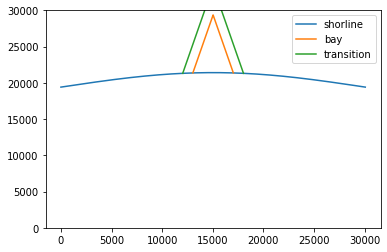

In [88]:

# s = np.ones(len(y))*y_bs # flat shore
s = y_bs+2000*abs(np.sin((x)*np.pi/x_max)) # one big curve
# s = y_bs+2000*abs(np.sin((x+x_max/4)*2*np.pi/x_max)) #curved with points

# add in triangular bay centered at x = x_bay
sb = np.empty((len(y)))
sb[:]=np.NaN
x_bay = x_max/2
bay_width = 4000
bay_height = 8000
out_bay = np.logical_or(x<(x_bay-bay_width/2),x>(x_bay+bay_width/2))
in_bay = out_bay==False
sb[out_bay]= np.NaN
sb[in_bay] = s[int(len(s)/2+bay_width/2/3)]+bay_height-abs(x[in_bay]-x_bay)*\
    bay_height/(bay_width/2)

# add in transition

trans = np.empty((len(y)))
trans[:]=np.NaN
trans_width = 1000
out_trans = np.logical_or(x<(x_bay-bay_width/2-trans_width),x>(x_bay+bay_width/2+trans_width))
in_trans = out_trans==False
trans[out_trans]= np.NaN
trans[in_trans] = s[int(len(s)/2+(bay_width/2+trans_width)/3)]+bay_height-\
    abs(x[in_trans]-x_bay)*bay_height/(bay_width/2)+trans_width*bay_height*2/bay_width

# add in river

river_width = bay_width/10
x_riv = np.logical_and(x > x_bay-river_width/2, x < x_bay+river_width/2)

plt.plot(x,s, label = 'shorline')
plt.plot(x,sb, label = 'bay')
plt.plot(x,trans, label = 'transition')
plt.legend()
plt.ylim([0,30000])
#%%

In [89]:
sb[1200]

nan

In [90]:


# to make 2d grid of z values
for col in range(z.shape[1]):
    # z[:,col]=syn_elev*abs(np.sin(10*x[col]))
    # z[:,col]=syn_elev*x[col]
    # z[:,col]=syn_elev+5*(np.sin(x[col]*np.pi/x_max))
    # z[:,col]=syn_elev
    ynew = y-s[col]+y_bs
    ynew[ynew<0]=0
    ynew[ynew>y_max]=y_max
    z[:,col]=cs(ynew)
    if in_bay[col]==True:
        y_bay = np.logical_and(y>s[col],y<sb[col])
        z[y_bay,col]=-5
        if x_riv[col]==True:
            y_riv = y>sb[col]
            z[y_riv,col]=-5
    if in_trans[col]==True:
        y_trans = np.logical_and(y>s[col],y<trans[col])
        y_trans2 = np.logical_and(y>s[col],y<trans[col])
    # z[:,col]=cs(y)


# to make xyz matrix
# for col in range(len(y)):
#     zs=syn_elev*abs(np.sin(10*y[col]))
#     ys = np.ones((len(dist)))
#     ys = ys*y[col]
#     new_vals = np.stack((x,ys,zs),axis = 1)
#     topo = np.append(topo,new_vals,axis=0)

#%%

# ycross = y-s[10]+y_bs
# zcross = cs(ycross)

# plt.plot(y,ycross)
# plt.plot(y,zcross)
#%%
# save topo to csv
# z_df = pd.DataFrame(z)
# z_df.to_csv(filepath,sep = '\t',index=False)


In [93]:

col=1
# to make 2d grid of z values
for col in range(z.shape[1]):
    # z[:,col]=syn_elev*abs(np.sin(10*x[col]))
    # z[:,col]=syn_elev*x[col]
    # z[:,col]=syn_elev+5*(np.sin(x[col]*np.pi/x_max))
    # z[:,col]=syn_elev
    ynew = y-s[col]+y_bs
    ynew[ynew<0]=0
    ynew[ynew>y_max]=y_max
    z[:,col]=cs(ynew)
            
    if in_trans[col]==True:
        position = sum(in_trans[1:col]) 
           
        if position <sum(in_trans)/2:
            X_trans = x[col]-(trans[col]-y)*bay_width/2/bay_height
            Y_trans = trans[x==X_trans]      
            z1 = z[int(Y_trans), int(X_trans)]
            z2 = -5
            slope = (z2-z1)/trans_width 
            z_trans = slope*(x[col])+ z1
                       
        if position >= sum(in_trans)/2:
             mirror_col = 2*x[bay]-x[col]
             z_trans = z[x==mirror_col]
        
        y_trans = np.logical_and(y>s[col],y<trans[col])
        z[y_trans,col] = z_trans
        
            
    if in_bay[col]==True:
        y_bay = np.logical_and(y>s[col],y<sb[col])
        z[y_bay,col]=-5
        if x_riv[col]==True:
            y_riv = y>sb[col]
            z[y_riv,col]=-5
        
        #y_trans2 = np.logical_and(y>s[col],y<trans[col])
    # z[:,col]=cs(y)


# to make xyz matrix
# for col in range(len(y)):
#     zs=syn_elev*abs(np.sin(10*y[col]))
#     ys = np.ones((len(dist)))
#     ys = ys*y[col]
#     new_vals = np.stack((x,ys,zs),axis = 1)
#     topo = np.append(topo,new_vals,axis=0)

#%%

# ycross = y-s[10]+y_bs
# zcross = cs(ycross)

# plt.plot(y,ycross)
# plt.plot(y,zcross)
#%%
# save topo to csv
# z_df = pd.DataFrame(z)
# z_df.to_csv(filepath,sep = '\t',index=False)


TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:

#%%

#visualize cross sections

xind = 5000

plt.plot(y,z[:,xind])

#%%

#heatmap
xis = np.linspace(10000/3,20000/3,num = 100,endpoint=False).astype(int)
yis = np.linspace(20000/3,30000/3,num = 100,endpoint=False).astype(int)
# xis = np.linspace(0,len(x),num = 100,endpoint=False).astype(int)
# yis = np.linspace(0,len(y),num = 100,endpoint=False).astype(int)
zis = np.meshgrid(yis,xis,indexing = 'ij')
zsub = z[zis]
zsub = np.flip(zsub)
# sns.color_palette("crest", as_cmap=True)
ax = sns.heatmap(zsub,cmap='seismic',center=0)



#%%
# contour plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x,y,z)

#%%

a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])
d = a+b
e=a*b
